**1. Importing the libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.layers import LSTM

**2. Load the Dataset**

In [2]:
data=pd.read_csv('NSE-TATAGLOBAL11.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


**3. Data Exploration and Cleaning**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
# check for the null values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


array([[<AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'High'}>,
        <AxesSubplot: title={'center': 'Low'}>],
       [<AxesSubplot: title={'center': 'Last'}>,
        <AxesSubplot: title={'center': 'Close'}>,
        <AxesSubplot: title={'center': 'Total Trade Quantity'}>],
       [<AxesSubplot: title={'center': 'Turnover (Lacs)'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

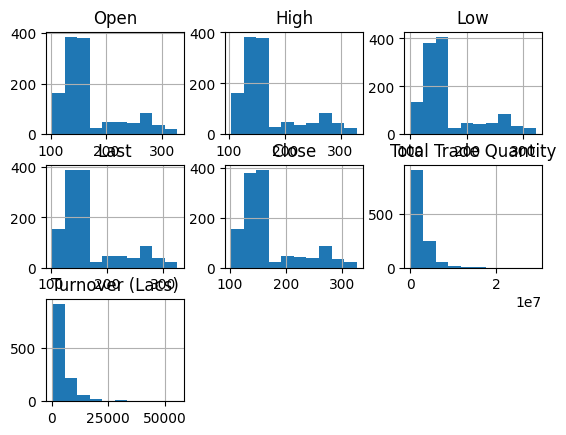

In [6]:
data.hist()

In [7]:
# sorting dataset with respect to dates
df=data.sort_values(by="Date")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


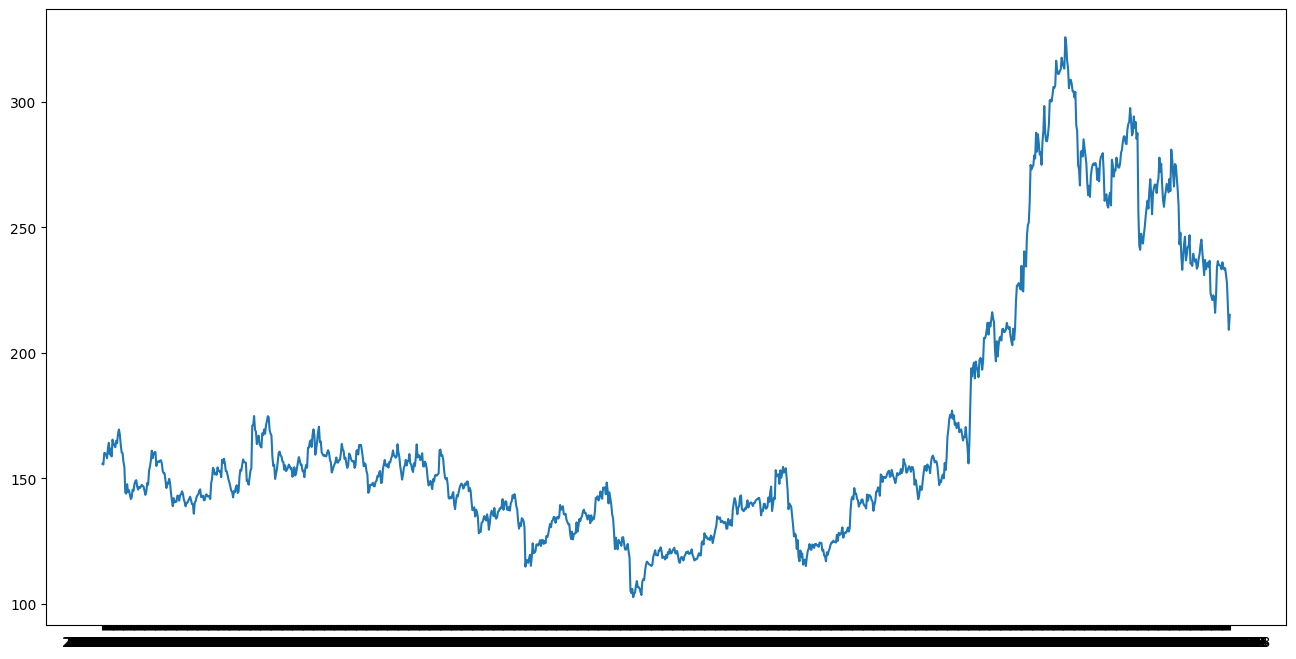

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])

In [11]:
srt_close=df['Close']

In [12]:
# performing feature scaling
scaler=MinMaxScaler(feature_range=(0,1))
srt_close=scaler.fit_transform(np.array(srt_close).reshape(-1,1))
srt_close

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

**4. Training Model**

In [13]:
training_size=int(len(srt_close)*0.70)
test_size=len(srt_close)-training_size
train_data, test_data = srt_close[0:training_size,:], srt_close[training_size:len(srt_close),:1]

In [14]:
def datasetcreate(dataset,time_step):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [15]:
time_step=100
x_train,y_train=datasetcreate(train_data,time_step)
x_test,y_test=datasetcreate(test_data,time_step)

In [16]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
ytest=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 8s 231ms/step - loss: 0.0081 - val_loss: 0.0014
Epoch 2/60
11/11 [==============================] - 1s 102ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 3/60
11/11 [==============================] - 1s 98ms/step - loss: 0.0018 - val_loss: 8.0859e-04
Epoch 4/60
11/11 [==============================] - 1s 100ms/step - loss: 0.0013 - val_loss: 5.4722e-04
Epoch 5/60
11/11 [==============================] - 1s 96ms/step - loss: 0.0010 - val_loss: 9.0770e-04
Epoch 6/60
11/11 [==============================] - 1s 100ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/60
11/11 [==============================] - 1s 104ms/step - loss: 9.8281e-04 - val_loss: 6.8258e-04
Epoch 8/60
11/11 [==============================] - 1s 102ms/step - loss: 9.3922e-04 - val_loss: 6.6275e-04
Epoch 9/60
11/11 [==============================] - 1s 99ms/step - loss: 9.1002e-04 - val_loss: 8.3287e-04
Epoch 10/60
11/11 [==============================] - 1s 95ms/step -

**5. Prediction**

In [19]:
test_predict= model.predict(x_test)
test_predict=scaler.inverse_transform(test_predict)

9/9 [==============================] - 1s 20ms/step


In [20]:
math.sqrt(mean_squared_error(y_test,test_predict))

250.37840464261697

In [21]:
df_testing_complete=pd.read_csv('NSE-TATAGLOBAL11.csv')

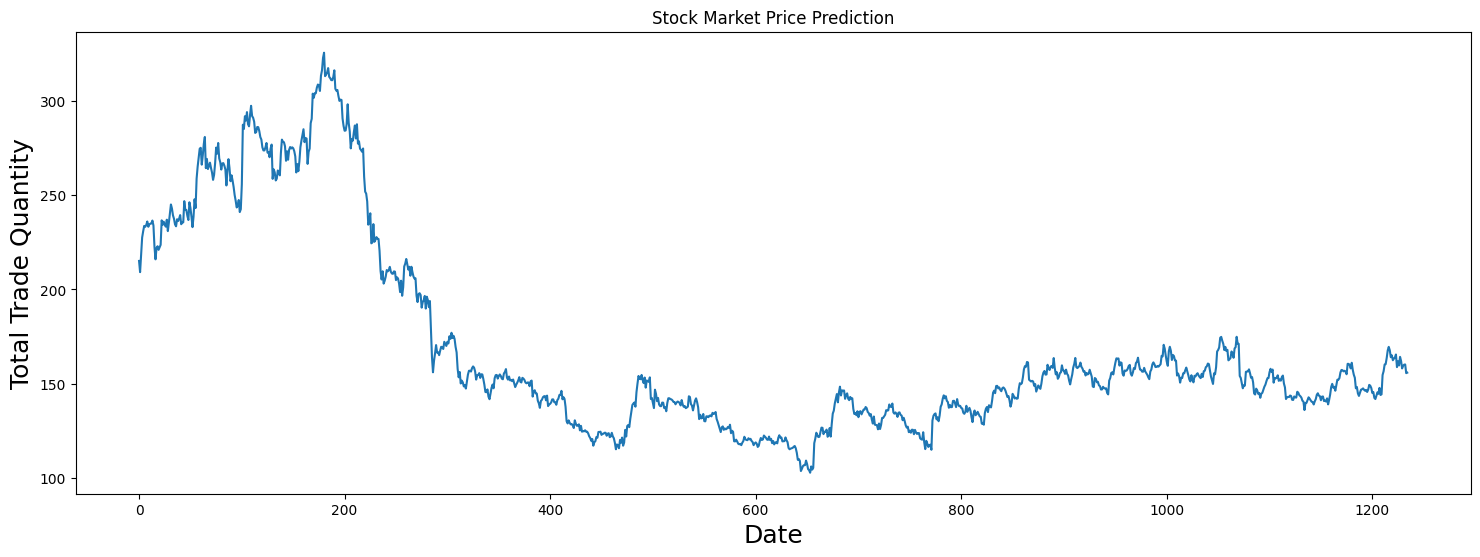

In [22]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(df_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

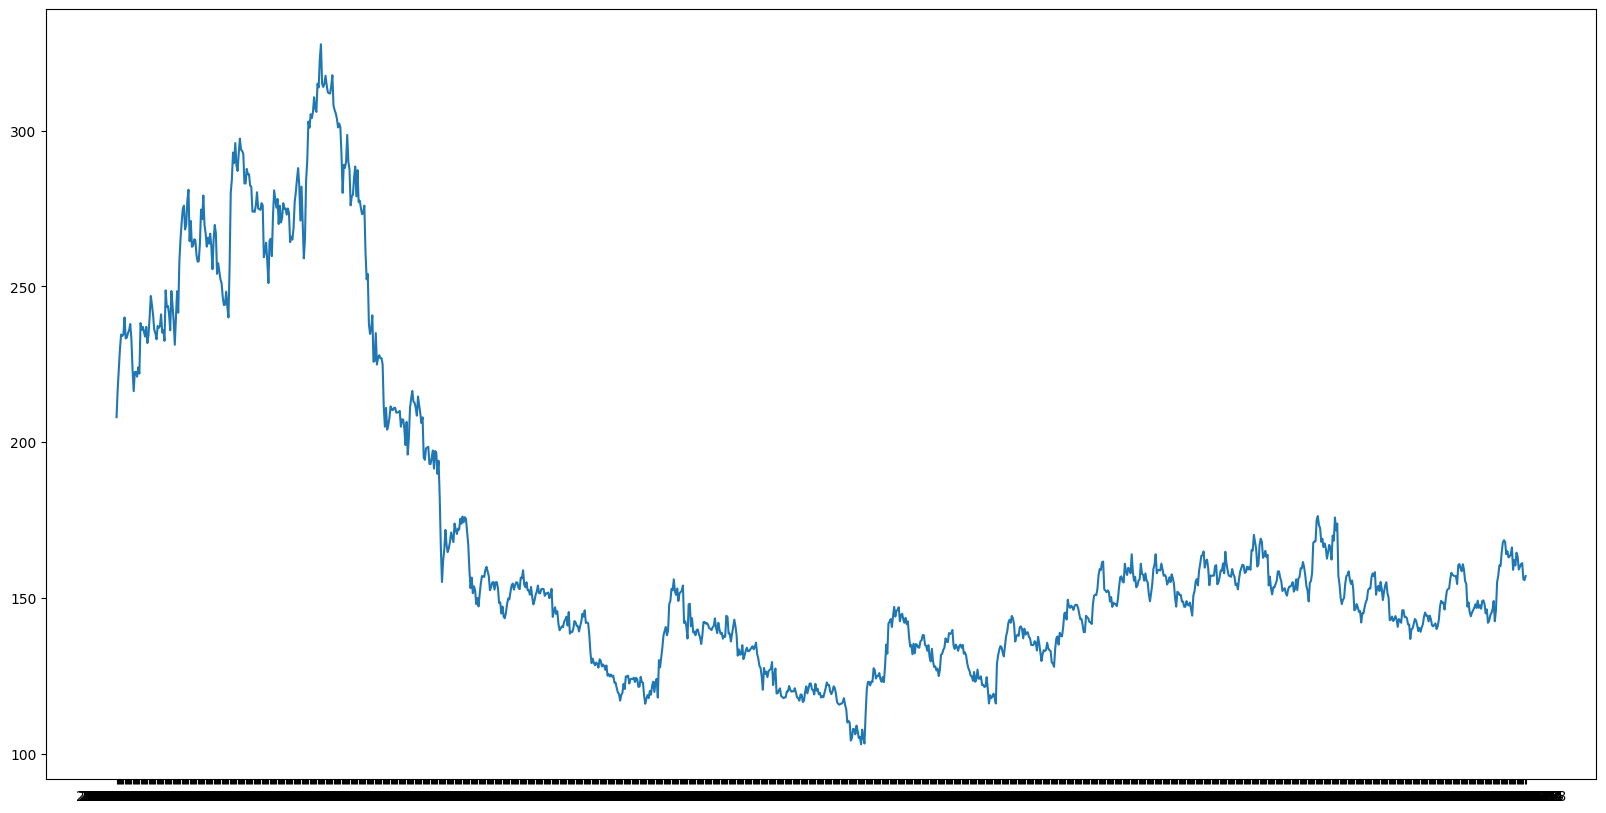

In [23]:
data.index = df['Date']
plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

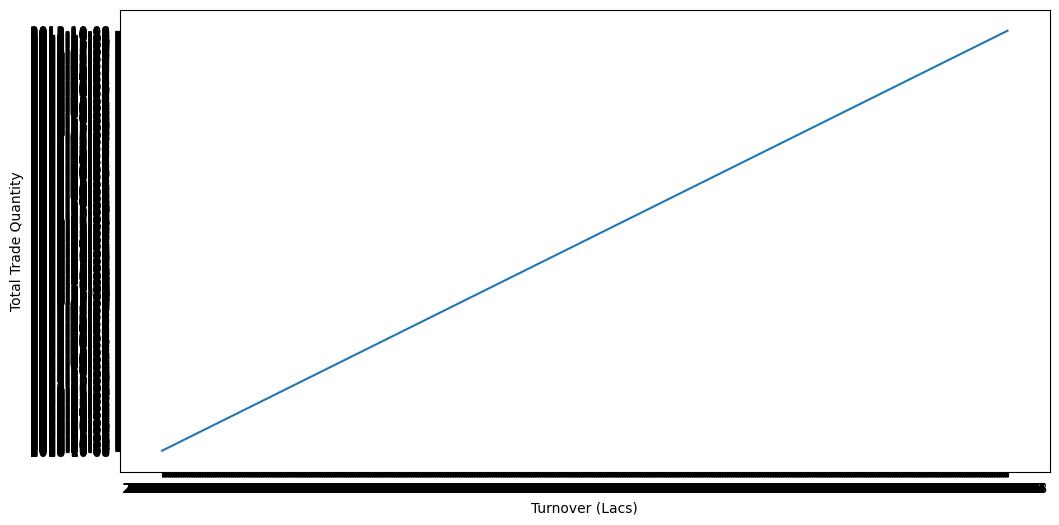

In [24]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=10)
plt.ylabel('Total Trade Quantity', fontsize=10)
plt.show()

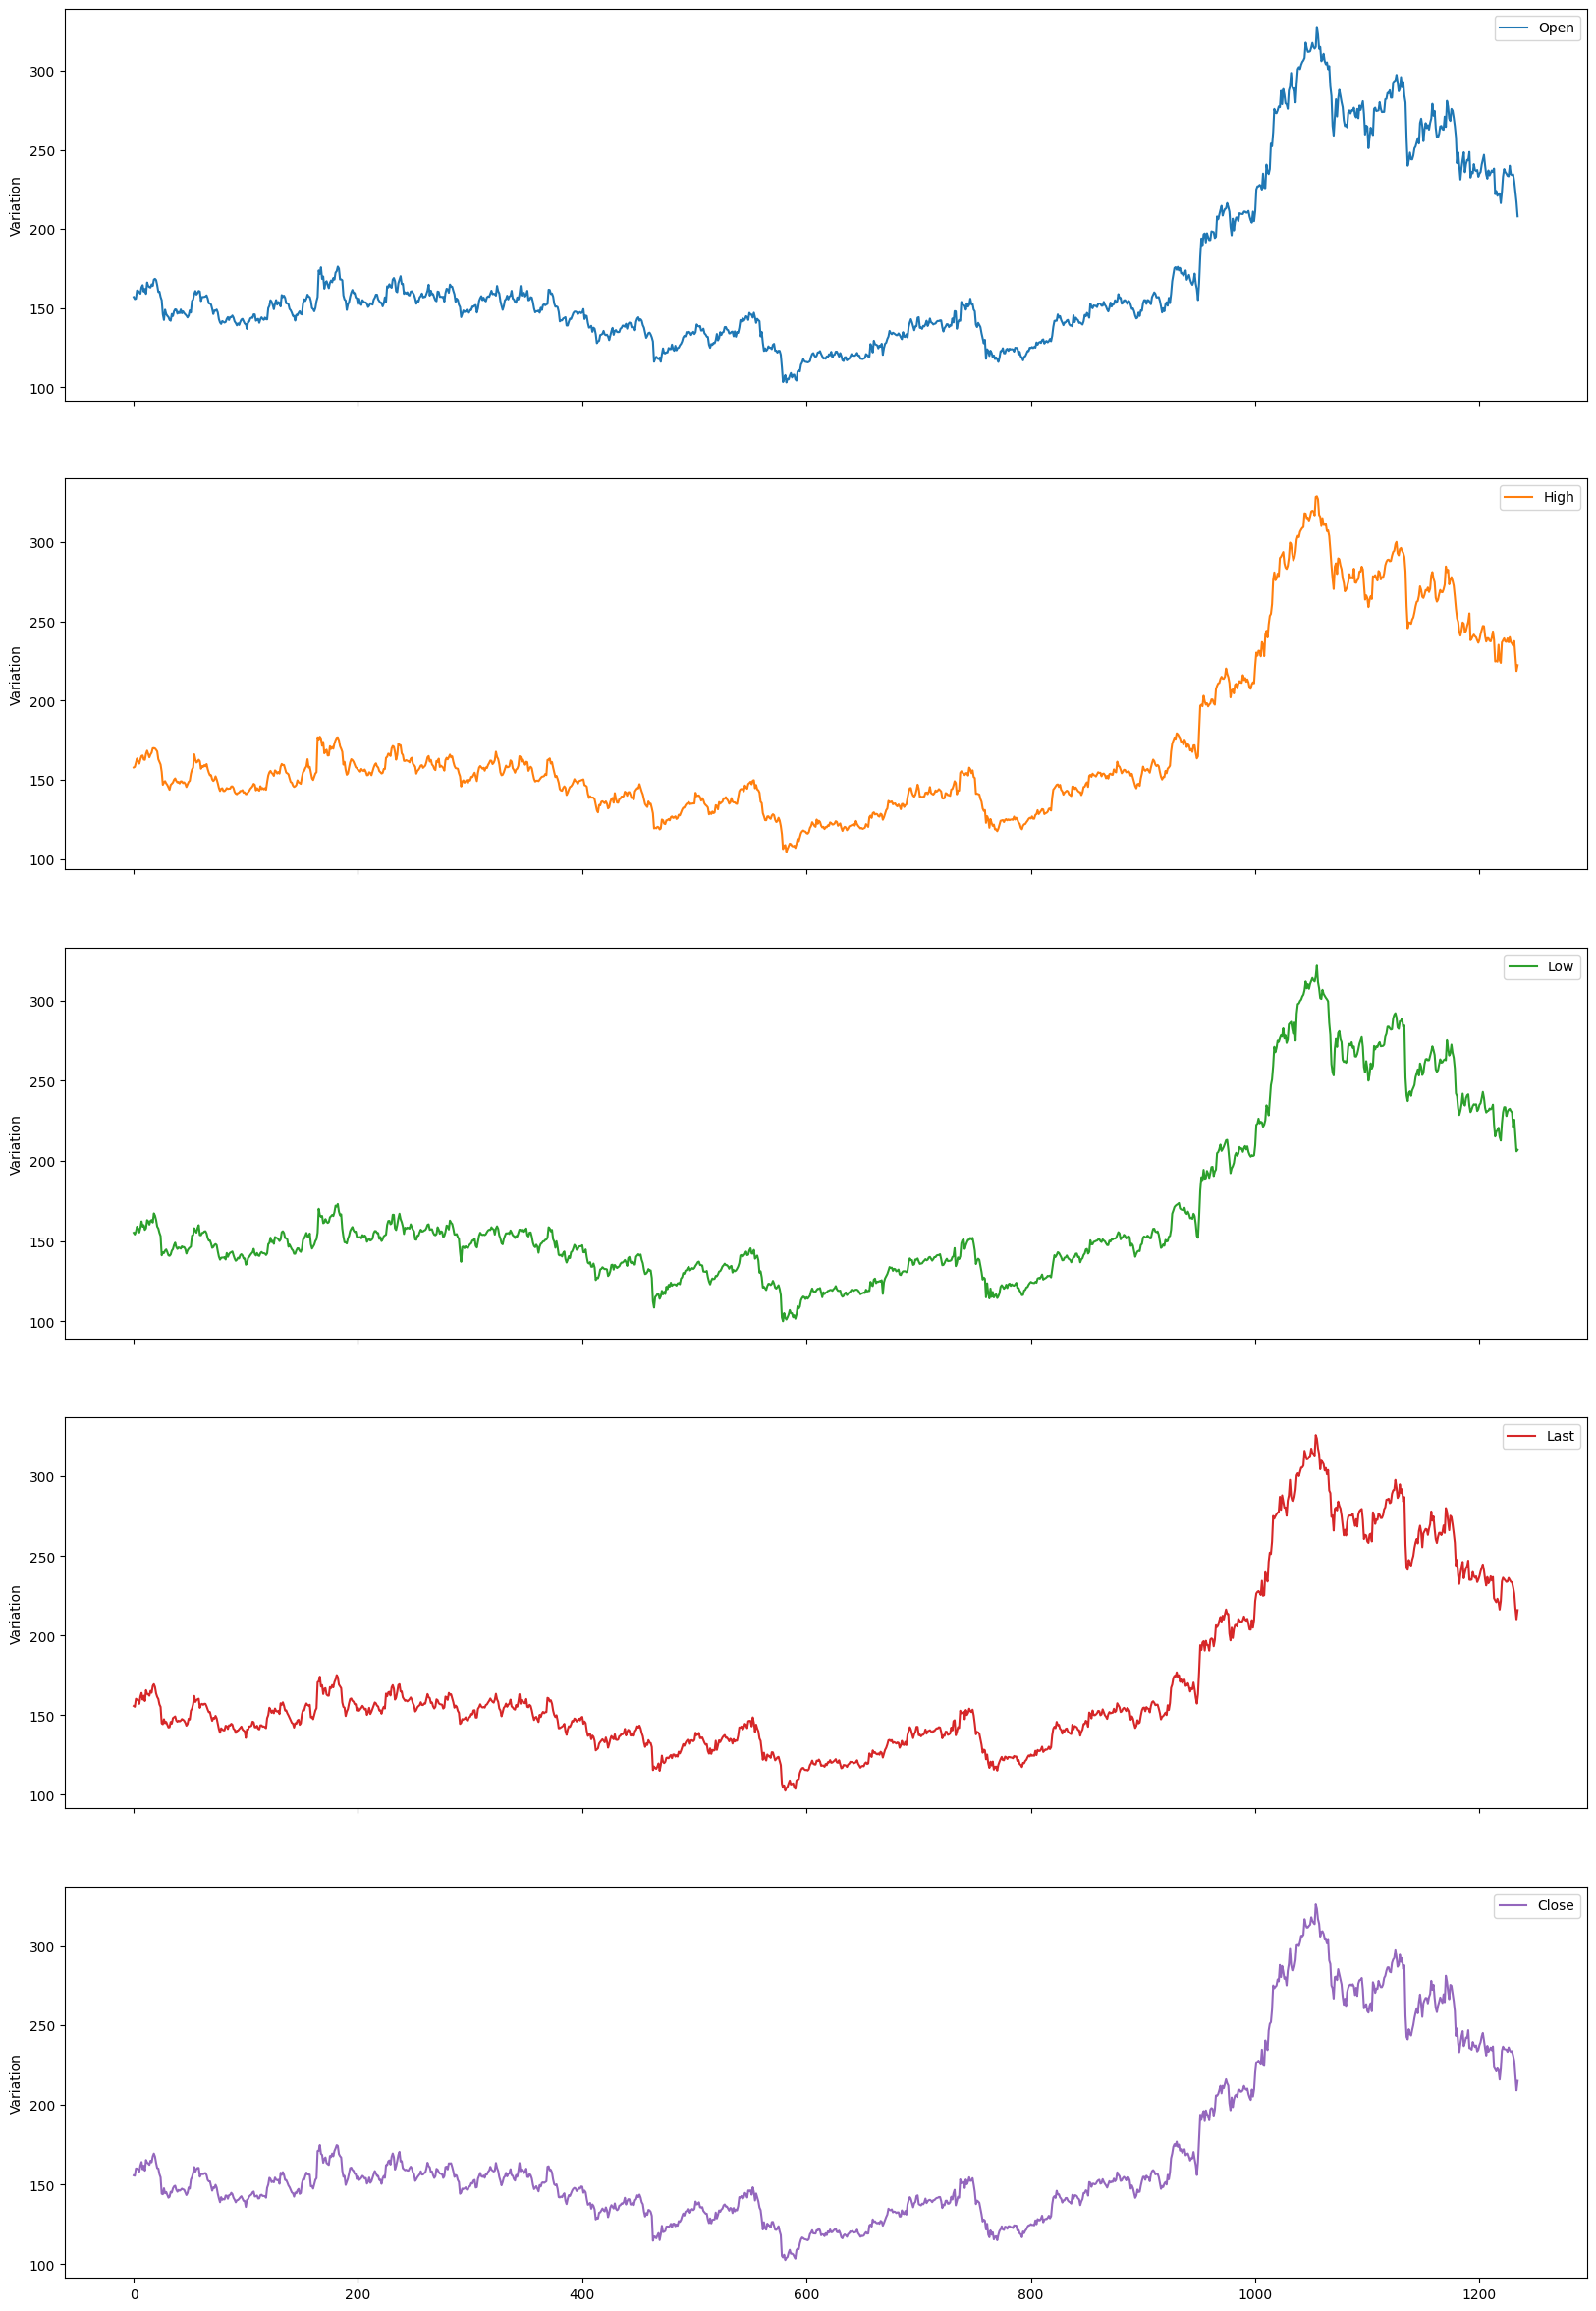

In [25]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)
for i in axes:
    i.set_ylabel('Variation')

In [28]:
print("R2 Score is : {:03f}".format(r2_score(y_test ,y_pred)))
print("Root Mean Squared Error is : {:03f}".format(mean_squared_error(y_test ,y_pred , squared = False)))
print("Mean Absolute Error is : {:03f}".format(mean_absolute_error(y_test ,y_pred))

SyntaxError: incomplete input (2128848327.py, line 3)